# Statistiken zur Kieler Woche

In [4]:
# CSV-Datei laden

import pandas as pd

file_path = '../_data_raw/df_kiwo.csv'  # Pfad zur Datei anpassen
merged_df = pd.read_csv(file_path)

# Filtere die Daten, bei denen 'KielerWoche' == 1
kiwo_only = merged_df[merged_df['KielerWoche'] == 1]

# Entferne Duplikate in der 'Datum'-Spalte, um sicherzustellen, dass jedes Datum nur einmal gezählt wird
unique_kiwo_dates = kiwo_only['Datum'].drop_duplicates()

# Zähle die eindeutigen Tage der Kieler Woche
kiwo_count = unique_kiwo_dates.count()

# Ausgabe
print(f"Die Kieler Woche hat an insgesamt {kiwo_count} verschiedenen Tagen stattgefunden.")

Die Kieler Woche hat an insgesamt 72 verschiedenen Tagen stattgefunden.


In [11]:
file_path = '../_data_raw/df_kiwo.csv'  # Pfad zur Datei anpassen
merged_df = pd.read_csv(file_path)

# Filtere die Daten für die Kieler Woche
umsatz_kiwo = merged_df[merged_df['KielerWoche'] == 1]

# Berechne den durchschnittlichen Umsatz pro Warengruppe
durchschnitt_umsatz_pro_warengruppe = umsatz_kiwo.groupby('Warengruppe')['Umsatz'].mean()

print("Durchschnittlicher Umsatz pro Warengruppe während der Kieler Woche:")
print(durchschnitt_umsatz_pro_warengruppe)

import matplotlib.pyplot as plt

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
durchschnitt_umsatz_pro_warengruppe.plot(kind='bar', color='skyblue', edgecolor='black')

# Diagramm anpassen
plt.title('Durchschnittlicher Umsatz pro Warengruppe während der Kieler Woche', fontsize=14)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xlabel('Warengruppe', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


KeyError: 'Warengruppe'

## Deskriptive Statistiken und Visualisierungen zu den Umsatzdaten

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden (korrigierter Pfad)
datei_pfad = 'df_umsatz.csv'  # Datei befindet sich im selben Arbeitsverzeichnis
daten = pd.read_csv(datei_pfad)

# Datum in Datumsformat umwandeln und Jahr extrahieren
daten['Datum'] = pd.to_datetime(daten['Datum'])
daten['Jahr'] = daten['Datum'].dt.year

# Umsatz je Jahr und Warengruppe summieren
umsatz_aggregiert = daten.groupby(['Jahr', 'Warengruppe'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle für Diagrammdarstellung erstellen
umsatz_pivot = umsatz_aggregiert.pivot(index='Jahr', columns='Warengruppe', values='Umsatz')

# Diagramm erstellen
umsatz_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Umsatz je Warengruppe über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Umsatz')
plt.legend(title='Warengruppe')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.tight_layout()
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'df_umsatz.csv'

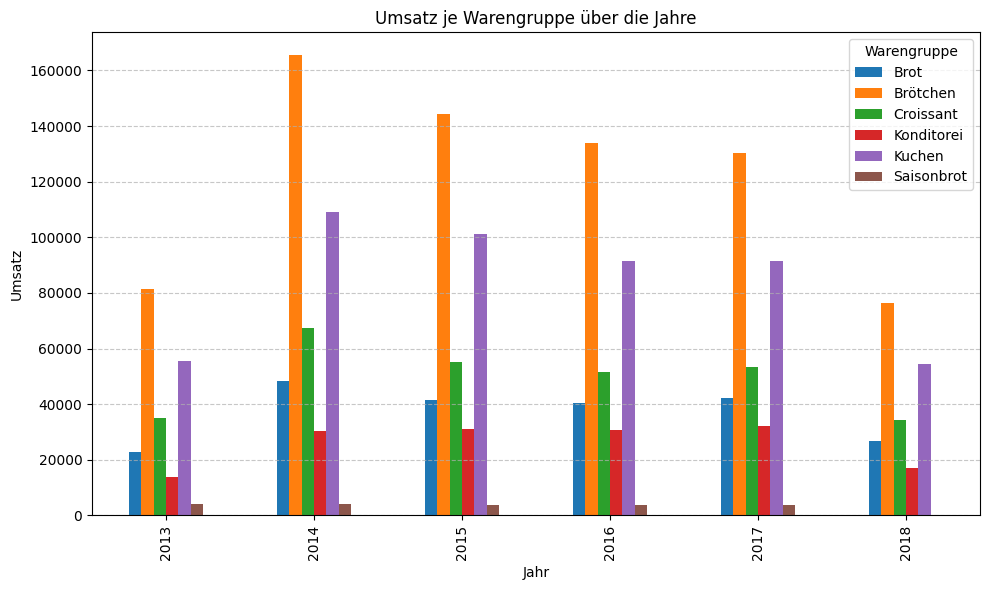

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden (korrigierter Pfad)
datei_pfad = 'df_umsatz.csv'  # Datei befindet sich im selben Arbeitsverzeichnis
daten = pd.read_csv(datei_pfad)

# Warengruppen-Umbenennung
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen-ID in lesbare Namen umbenennen
daten['Warengruppe'] = daten['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln und Jahr extrahieren
daten['Datum'] = pd.to_datetime(daten['Datum'])
daten['Jahr'] = daten['Datum'].dt.year

# Umsatz je Jahr und Warengruppe summieren
umsatz_aggregiert = daten.groupby(['Jahr', 'Warengruppe'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle für Diagrammdarstellung erstellen
umsatz_pivot = umsatz_aggregiert.pivot(index='Jahr', columns='Warengruppe', values='Umsatz')

# Diagramm erstellen
umsatz_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Umsatz je Warengruppe über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Umsatz')
plt.legend(title='Warengruppe')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


## Monatlicher Umsatz für die Warengruppe 6 (Saisonbrot) von 2013 - 2018

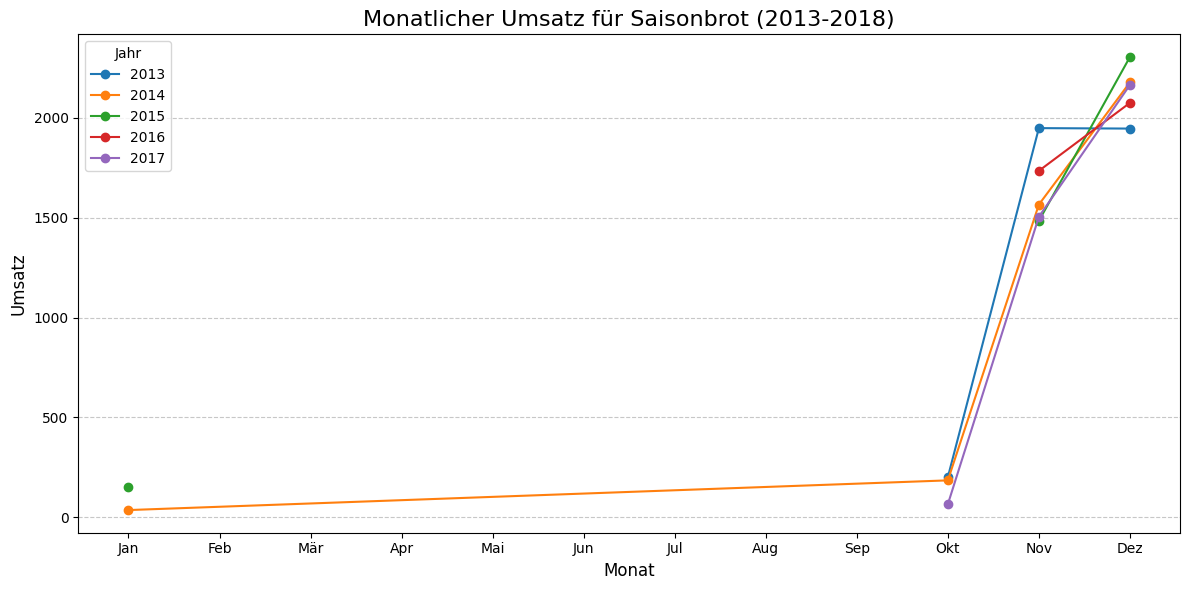

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = 'df_umsatz.csv'  # Pfad zur Datei anpassen
data = pd.read_csv(file_path)

# Warengruppen-Mapping anpassen
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Kuchen',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen umbenennen
data['Warengruppe'] = data['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln und Jahr/Monat extrahieren
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')  # Fehlerhafte Werte in NaT umwandeln
data['Monat'] = data['Datum'].dt.month
data['Jahr'] = data['Datum'].dt.year

# Überprüfen, ob Umsatz numerisch ist
data['Umsatz'] = pd.to_numeric(data['Umsatz'], errors='coerce')

# Daten filtern: Nur Warengruppe "Saisonbrot" und Jahre 2013-2018
filtered_data = data[(data['Warengruppe'] == 'Saisonbrot') & 
                     (data['Jahr'].isin([2013, 2014, 2015, 2016, 2017, 2018]))]

# Monatlichen Umsatz aggregieren
monthly_sales = filtered_data.groupby(['Jahr', 'Monat'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle erstellen
sales_pivot = monthly_sales.pivot(index='Monat', columns='Jahr', values='Umsatz')

# Plot erstellen
plt.figure(figsize=(12, 6))
for year in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[year], marker='o', label=str(year))

# Diagramm anpassen
plt.title('Monatlicher Umsatz für Saisonbrot (2013-2018)', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Umsatz', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun',
    'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Jahr', fontsize=10)
plt.tight_layout()
plt.show()



## Monatlicher Umsatz für die Warengruppe 5 (Kuchen) von 2013 - 2018

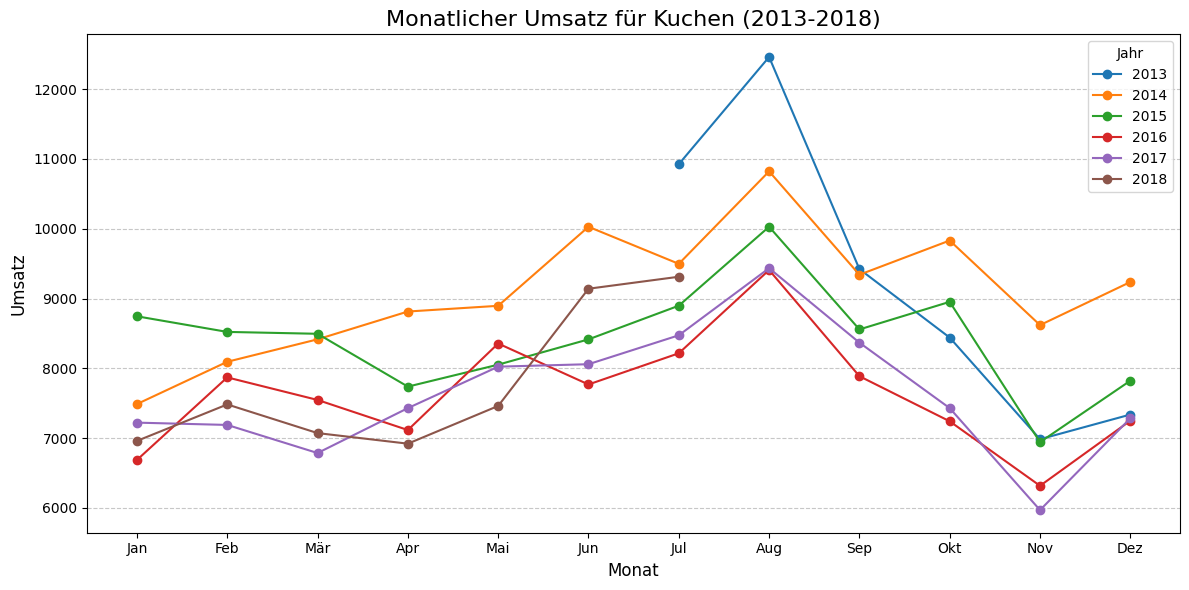

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = 'df_umsatz.csv'  # Pfad zur Datei anpassen
data = pd.read_csv(file_path)

# Warengruppen-Mapping anpassen
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen umbenennen
data['Warengruppe'] = data['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln und Jahr/Monat extrahieren
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')  # Fehlerhafte Werte in NaT umwandeln
data['Monat'] = data['Datum'].dt.month
data['Jahr'] = data['Datum'].dt.year

# Überprüfen, ob Umsatz numerisch ist
data['Umsatz'] = pd.to_numeric(data['Umsatz'], errors='coerce')

# Daten filtern: Nur Warengruppe "Kuchen" und Jahre 2013-2018
filtered_data = data[(data['Warengruppe'] == 'Kuchen') & 
                     (data['Jahr'].isin([2013, 2014, 2015, 2016, 2017, 2018]))]

# Monatlichen Umsatz aggregieren
monthly_sales = filtered_data.groupby(['Jahr', 'Monat'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle erstellen
sales_pivot = monthly_sales.pivot(index='Monat', columns='Jahr', values='Umsatz')

# Plot erstellen
plt.figure(figsize=(12, 6))
for year in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[year], marker='o', label=str(year))

# Diagramm anpassen
plt.title('Monatlicher Umsatz für Kuchen (2013-2018)', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Umsatz', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun',
    'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Jahr', fontsize=10)
plt.tight_layout()
plt.show()



## Monatlicher Umsatz für die Warengruppe 4 (Konditorei) von 2013 - 2018

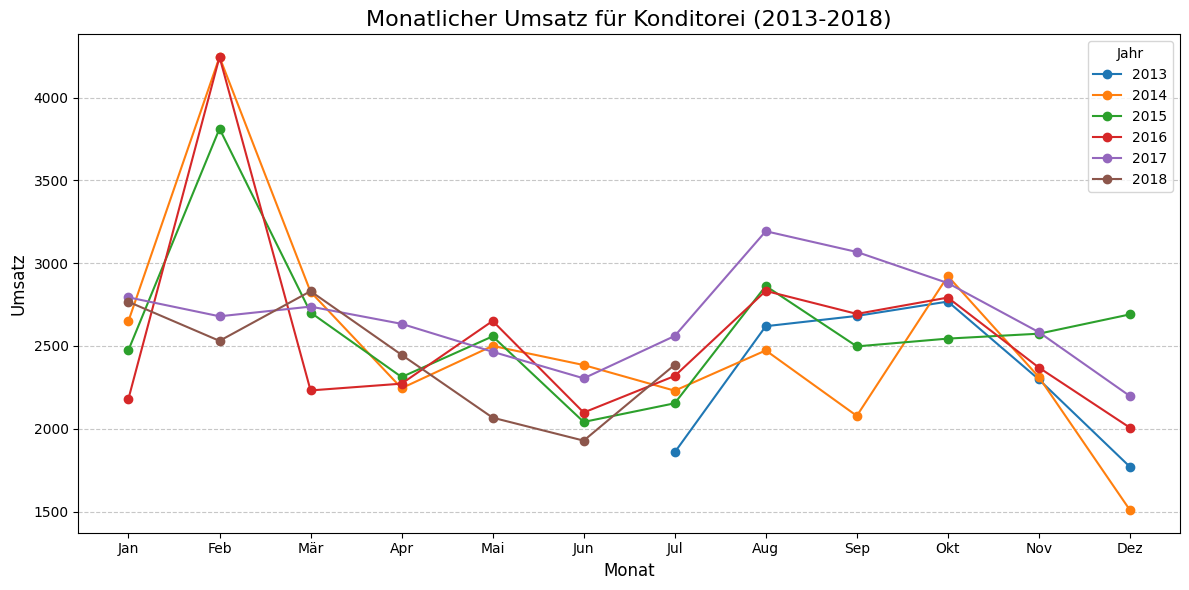

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = 'df_umsatz.csv'  # Pfad zur Datei anpassen
data = pd.read_csv(file_path)

# Warengruppen-Mapping anpassen
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen umbenennen
data['Warengruppe'] = data['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln und Jahr/Monat extrahieren
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')  # Fehlerhafte Werte in NaT umwandeln
data['Monat'] = data['Datum'].dt.month
data['Jahr'] = data['Datum'].dt.year

# Überprüfen, ob Umsatz numerisch ist
data['Umsatz'] = pd.to_numeric(data['Umsatz'], errors='coerce')

# Daten filtern: Nur Warengruppe "Konditorei" und Jahre 2013-2018
filtered_data = data[(data['Warengruppe'] == 'Konditorei') & 
                     (data['Jahr'].isin([2013, 2014, 2015, 2016, 2017, 2018]))]

# Monatlichen Umsatz aggregieren
monthly_sales = filtered_data.groupby(['Jahr', 'Monat'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle erstellen
sales_pivot = monthly_sales.pivot(index='Monat', columns='Jahr', values='Umsatz')

# Plot erstellen
plt.figure(figsize=(12, 6))
for year in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[year], marker='o', label=str(year))

# Diagramm anpassen
plt.title('Monatlicher Umsatz für Konditorei (2013-2018)', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Umsatz', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun',
    'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Jahr', fontsize=10)
plt.tight_layout()
plt.show()

## Monatlicher Umsatz für die Warengruppe 3 (Croissant) von 2013 - 2018

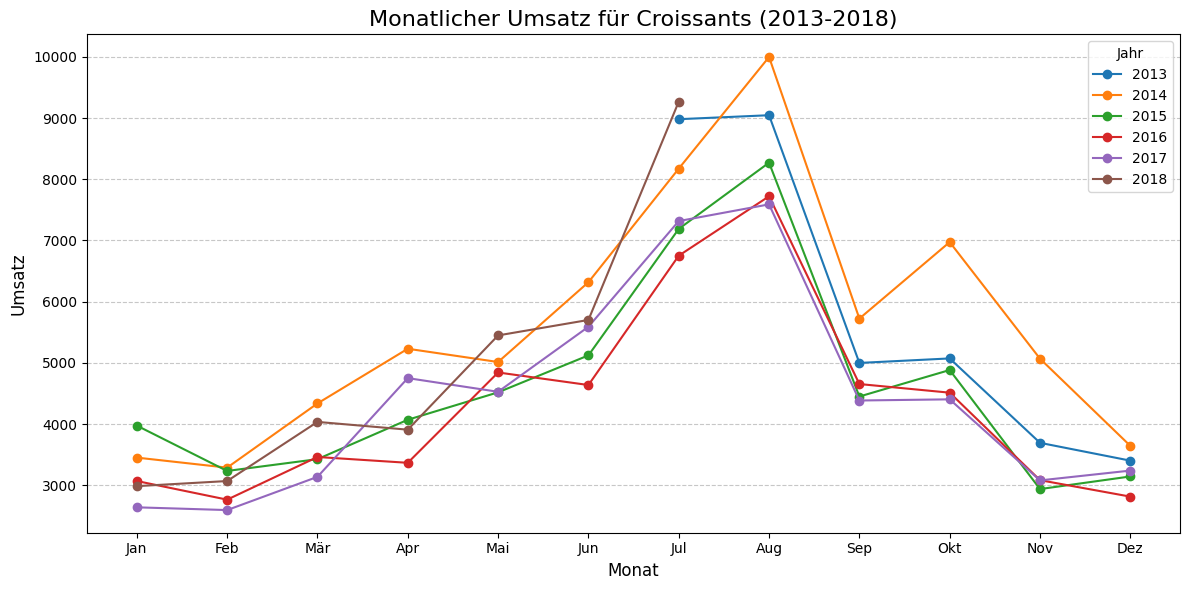

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = 'df_umsatz.csv'  # Pfad zur Datei anpassen
data = pd.read_csv(file_path)

# Warengruppen-Mapping anpassen
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen umbenennen
data['Warengruppe'] = data['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln und Jahr/Monat extrahieren
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')  # Fehlerhafte Werte in NaT umwandeln
data['Monat'] = data['Datum'].dt.month
data['Jahr'] = data['Datum'].dt.year

# Überprüfen, ob Umsatz numerisch ist
data['Umsatz'] = pd.to_numeric(data['Umsatz'], errors='coerce')

# Daten filtern: Nur Warengruppe "Croissant" und Jahre 2013-2018
filtered_data = data[(data['Warengruppe'] == 'Croissant') & 
                     (data['Jahr'].isin([2013, 2014, 2015, 2016, 2017, 2018]))]

# Monatlichen Umsatz aggregieren
monthly_sales = filtered_data.groupby(['Jahr', 'Monat'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle erstellen
sales_pivot = monthly_sales.pivot(index='Monat', columns='Jahr', values='Umsatz')

# Plot erstellen
plt.figure(figsize=(12, 6))
for year in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[year], marker='o', label=str(year))

# Diagramm anpassen
plt.title('Monatlicher Umsatz für Croissants (2013-2018)', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Umsatz', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun',
    'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Jahr', fontsize=10)
plt.tight_layout()
plt.show()

## Monatlicher Umsatz für die Warengruppe 2 (Brötchen) von 2013 - 2018

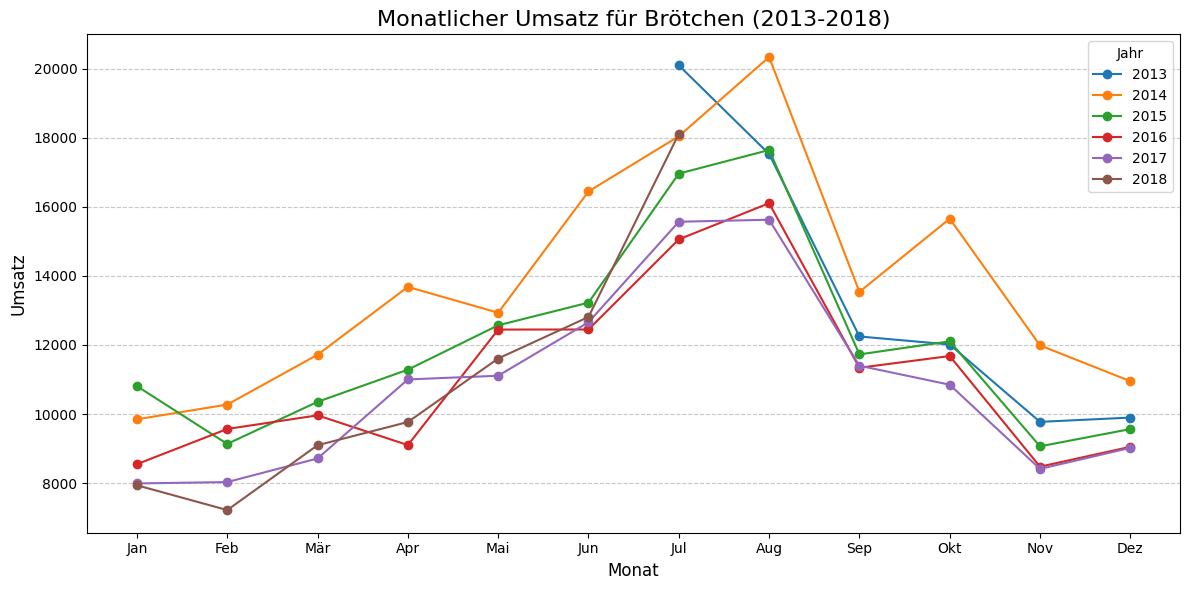

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = 'df_umsatz.csv'  # Pfad zur Datei anpassen
data = pd.read_csv(file_path)

# Warengruppen-Mapping anpassen
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen umbenennen
data['Warengruppe'] = data['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln und Jahr/Monat extrahieren
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')  # Fehlerhafte Werte in NaT umwandeln
data['Monat'] = data['Datum'].dt.month
data['Jahr'] = data['Datum'].dt.year

# Überprüfen, ob Umsatz numerisch ist
data['Umsatz'] = pd.to_numeric(data['Umsatz'], errors='coerce')

# Daten filtern: Nur Warengruppe "Brötchen" und Jahre 2013-2018
filtered_data = data[(data['Warengruppe'] == 'Brötchen') & 
                     (data['Jahr'].isin([2013, 2014, 2015, 2016, 2017, 2018]))]

# Monatlichen Umsatz aggregieren
monthly_sales = filtered_data.groupby(['Jahr', 'Monat'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle erstellen
sales_pivot = monthly_sales.pivot(index='Monat', columns='Jahr', values='Umsatz')

# Plot erstellen
plt.figure(figsize=(12, 6))
for year in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[year], marker='o', label=str(year))

# Diagramm anpassen
plt.title('Monatlicher Umsatz für Brötchen (2013-2018)', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Umsatz', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun',
    'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Jahr', fontsize=10)
plt.tight_layout()
plt.show()

## Monatlicher Umsatz für die Warengruppe 1 (Brot) von 2013 - 2018

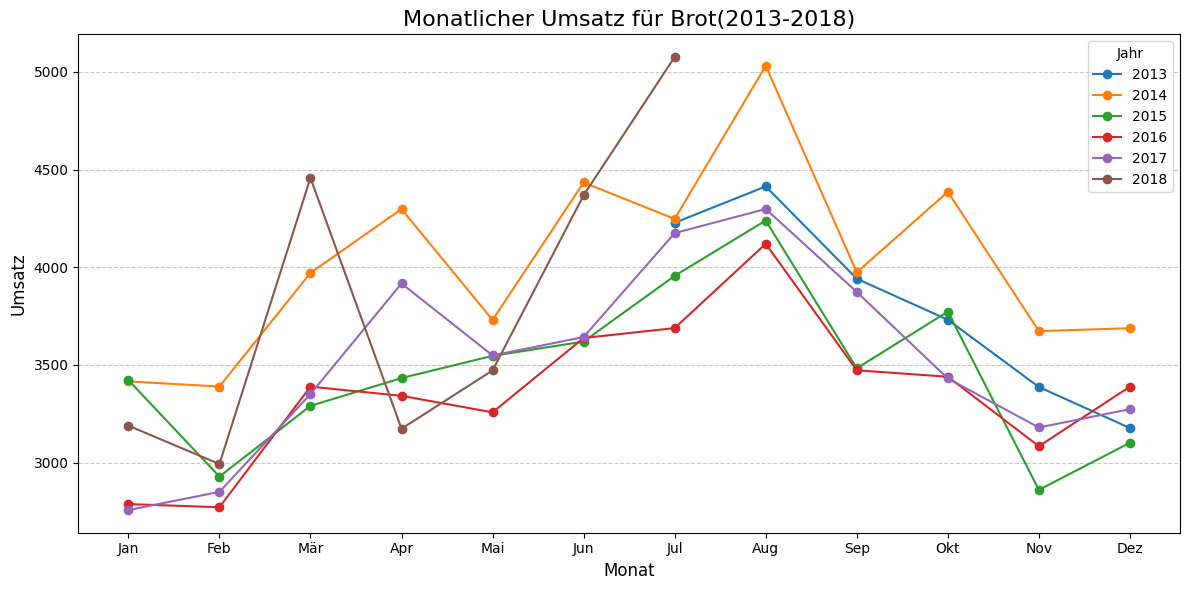

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = 'df_umsatz.csv'  # Pfad zur Datei anpassen
data = pd.read_csv(file_path)

# Warengruppen-Mapping anpassen
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen umbenennen
data['Warengruppe'] = data['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln und Jahr/Monat extrahieren
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')  # Fehlerhafte Werte in NaT umwandeln
data['Monat'] = data['Datum'].dt.month
data['Jahr'] = data['Datum'].dt.year

# Überprüfen, ob Umsatz numerisch ist
data['Umsatz'] = pd.to_numeric(data['Umsatz'], errors='coerce')

# Daten filtern: Nur Warengruppe "Brot" und Jahre 2013-2018
filtered_data = data[(data['Warengruppe'] == 'Brot') & 
                     (data['Jahr'].isin([2013, 2014, 2015, 2016, 2017, 2018]))]

# Monatlichen Umsatz aggregieren
monthly_sales = filtered_data.groupby(['Jahr', 'Monat'])['Umsatz'].sum().reset_index()

# Pivot-Tabelle erstellen
sales_pivot = monthly_sales.pivot(index='Monat', columns='Jahr', values='Umsatz')

# Plot erstellen
plt.figure(figsize=(12, 6))
for year in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[year], marker='o', label=str(year))

# Diagramm anpassen
plt.title('Monatlicher Umsatz für Brot(2013-2018)', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Umsatz', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun',
    'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Jahr', fontsize=10)
plt.tight_layout()
plt.show()

## Prozentualer Anteil

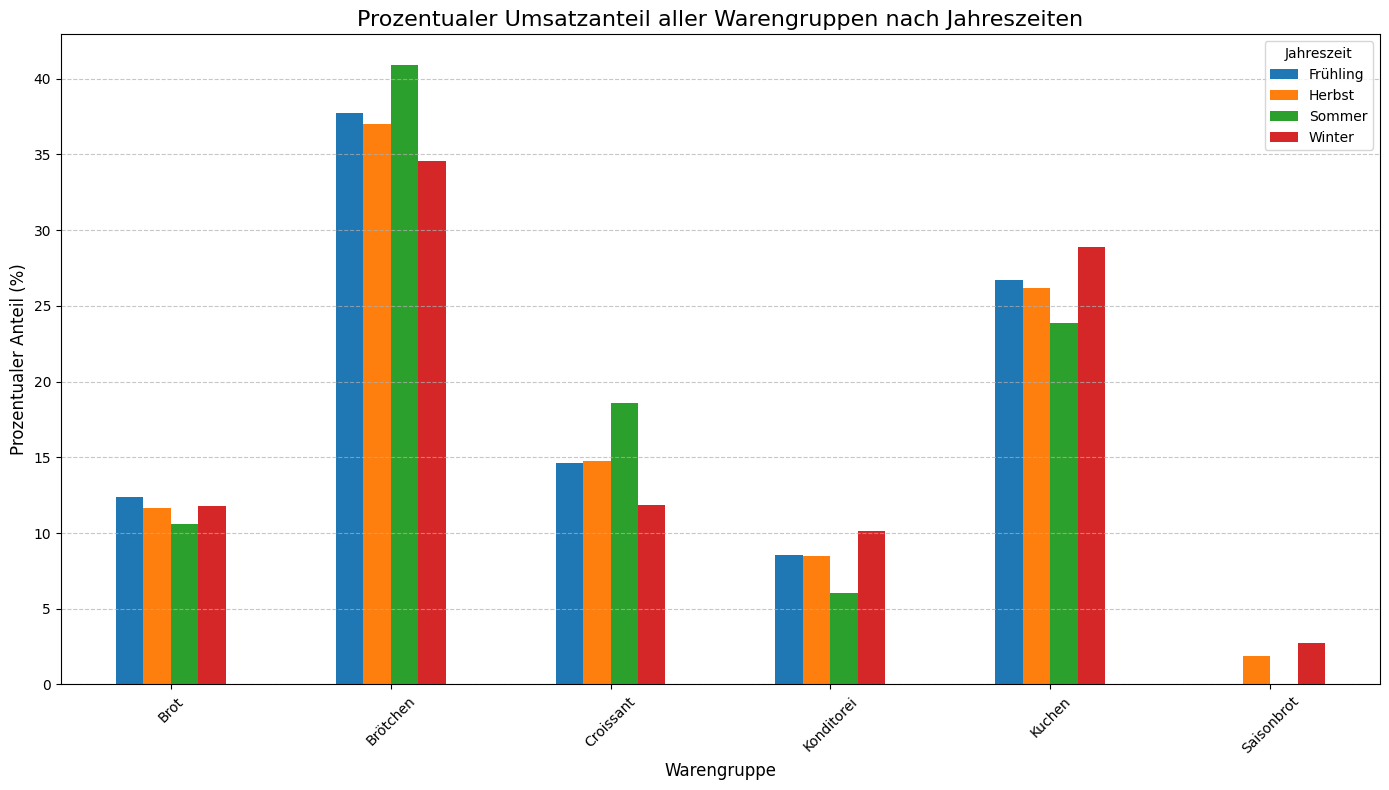

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = 'df_umsatz.csv'  # Pfad zur Datei anpassen
data = pd.read_csv(file_path)

# Warengruppen-Mapping anpassen
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen umbenennen
data['Warengruppe'] = data['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')  # Fehlerhafte Werte in NaT umwandeln
data['Monat'] = data['Datum'].dt.month
data['Jahr'] = data['Datum'].dt.year

# Überprüfen, ob Umsatz numerisch ist
data['Umsatz'] = pd.to_numeric(data['Umsatz'], errors='coerce')

# Jahreszeiten definieren
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Frühling'
    elif month in [6, 7, 8]:
        return 'Sommer'
    elif month in [9, 10, 11]:
        return 'Herbst'

data['Jahreszeit'] = data['Monat'].apply(get_season)

# Umsatz pro Jahreszeit und Warengruppe aggregieren
seasonal_sales = data.groupby(['Jahreszeit', 'Warengruppe'])['Umsatz'].sum().reset_index()

# Umsatz pro Jahreszeit berechnen
season_total_sales = seasonal_sales.groupby('Jahreszeit')['Umsatz'].sum().reset_index()
seasonal_sales = pd.merge(seasonal_sales, season_total_sales, on='Jahreszeit', suffixes=('', '_total'))

# Prozentualen Anteil berechnen
seasonal_sales['Prozentualer Anteil'] = (seasonal_sales['Umsatz'] / seasonal_sales['Umsatz_total']) * 100

# Pivot-Tabelle für die Darstellung erstellen
seasonal_pivot = seasonal_sales.pivot(index='Warengruppe', columns='Jahreszeit', values='Prozentualer Anteil')

# Plot erstellen
seasonal_pivot.plot(kind='bar', figsize=(14, 8))

# Diagramm anpassen
plt.title('Prozentualer Umsatzanteil aller Warengruppen nach Jahreszeiten', fontsize=16)
plt.xlabel('Warengruppe', fontsize=12)
plt.ylabel('Prozentualer Anteil (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Jahreszeit', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


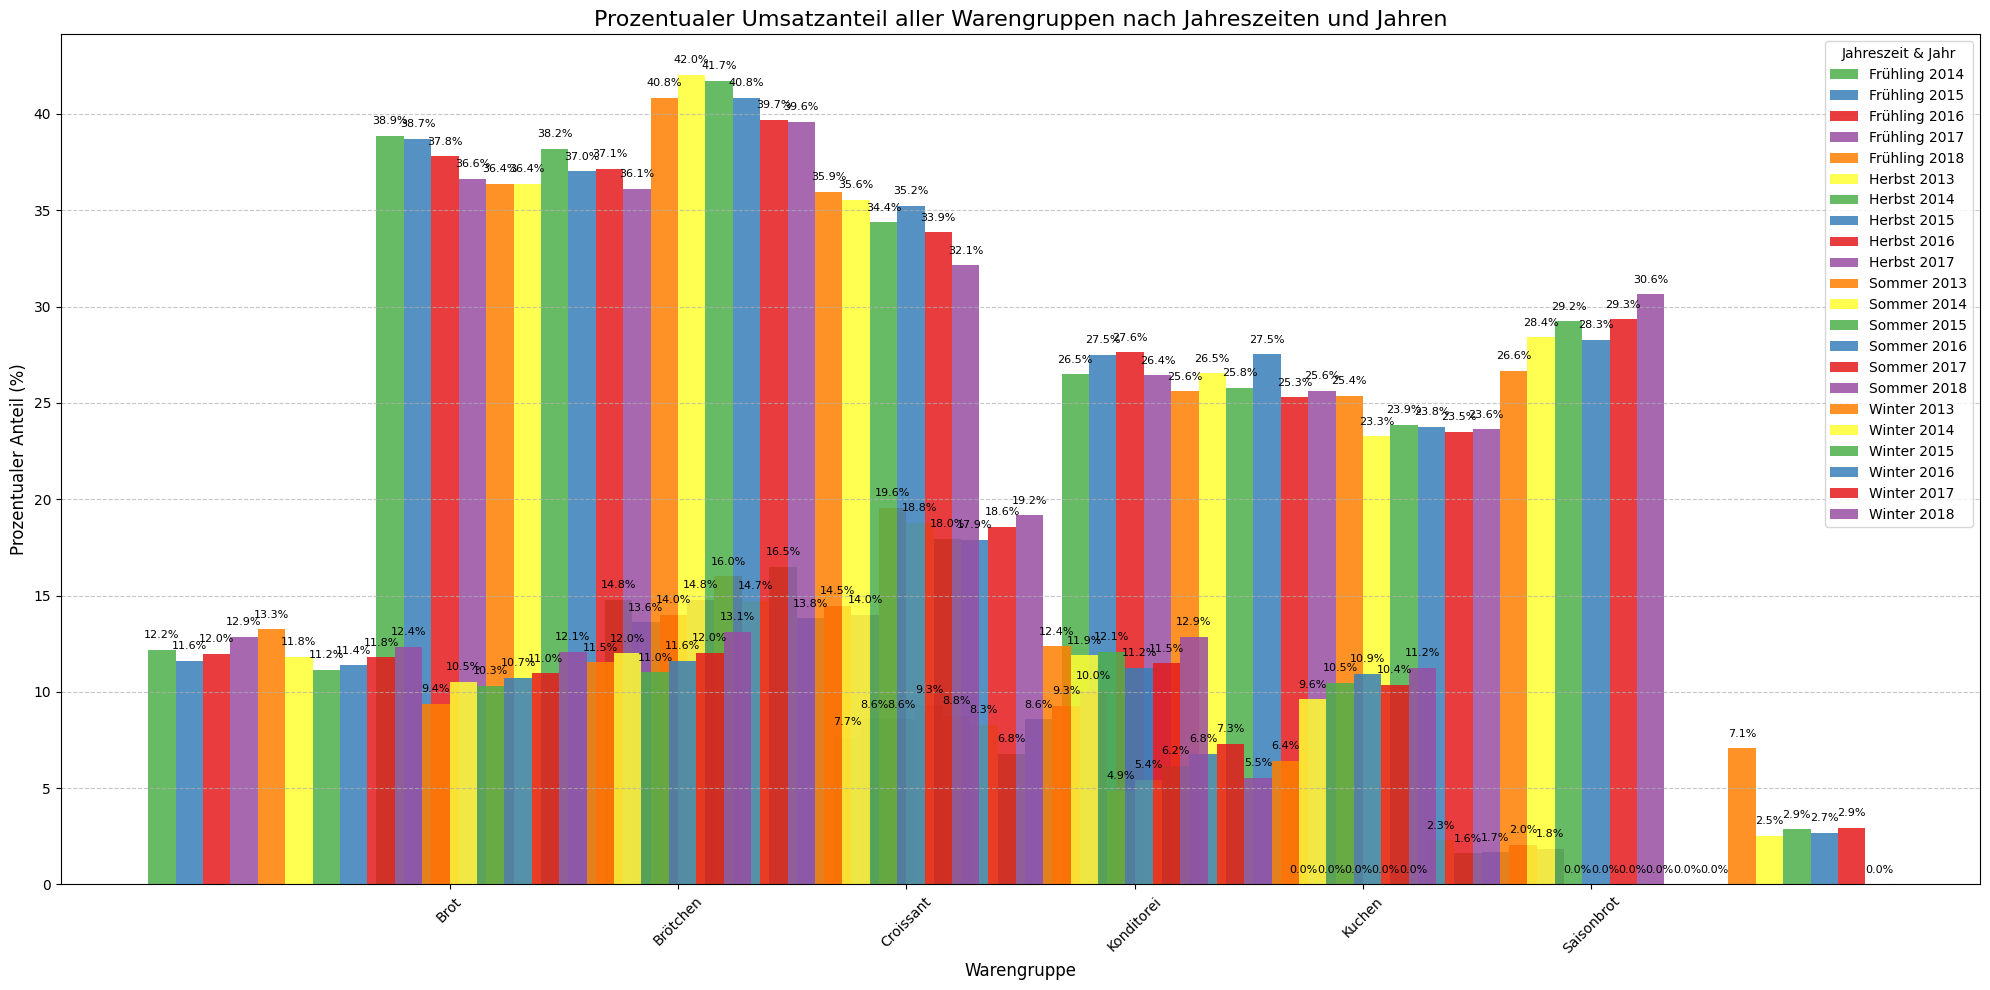

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV-Datei laden
file_path = 'df_umsatz.csv'  # Pfad zur Datei anpassen
data = pd.read_csv(file_path)

# Warengruppen-Mapping anpassen
warengruppen_mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Warengruppen umbenennen
data['Warengruppe'] = data['Warengruppe'].map(warengruppen_mapping)

# Datum in Datumsformat umwandeln
data['Datum'] = pd.to_datetime(data['Datum'], errors='coerce')  # Fehlerhafte Werte in NaT umwandeln
data['Monat'] = data['Datum'].dt.month
data['Jahr'] = data['Datum'].dt.year

# Überprüfen, ob Umsatz numerisch ist
data['Umsatz'] = pd.to_numeric(data['Umsatz'], errors='coerce')

# Daten auf relevante Jahre filtern
data = data[data['Jahr'].isin([2013, 2014, 2015, 2016, 2017, 2018])]

# Jahreszeiten definieren
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Frühling'
    elif month in [6, 7, 8]:
        return 'Sommer'
    elif month in [9, 10, 11]:
        return 'Herbst'

data['Jahreszeit'] = data['Monat'].apply(get_season)

# Umsatz pro Jahreszeit, Jahr und Warengruppe aggregieren
seasonal_sales = data.groupby(['Jahreszeit', 'Jahr', 'Warengruppe'])['Umsatz'].sum().reset_index()

# Umsatz pro Jahreszeit und Jahr berechnen
season_total_sales = seasonal_sales.groupby(['Jahreszeit', 'Jahr'])['Umsatz'].sum().reset_index()
seasonal_sales = pd.merge(seasonal_sales, season_total_sales, on=['Jahreszeit', 'Jahr'], suffixes=('', '_total'))

# Prozentualen Anteil berechnen
seasonal_sales['Prozentualer Anteil'] = (seasonal_sales['Umsatz'] / seasonal_sales['Umsatz_total']) * 100

# Pivot-Tabelle für die Darstellung erstellen
seasonal_pivot = seasonal_sales.pivot(index='Warengruppe', columns=['Jahreszeit', 'Jahr'], values='Prozentualer Anteil')

# Plot erstellen
fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 0.12  # Breite der Balken
x = np.arange(len(seasonal_pivot))  # Positionen der Warengruppen

# Balken für jede Jahreszeit und jedes Jahr
colors = ['#4daf4a', '#377eb8', '#e41a1c', '#984ea3', '#ff7f00', '#ffff33']
columns = list(seasonal_pivot.columns)  # Zugriff auf MultiIndex-Spalten
for i, (season_year) in enumerate(columns):
    ax.bar(
        x + i * bar_width,
        seasonal_pivot[season_year].fillna(0),  # Fehlende Werte mit 0 ersetzen
        width=bar_width,
        label=f'{season_year[0]} {season_year[1]}',
        alpha=0.85,
        color=colors[i % len(colors)]
    )
    # Prozentangaben in die Balken einfügen
    for j, value in enumerate(seasonal_pivot[season_year].fillna(0)):
        ax.text(
            x[j] + i * bar_width,
            value + 0.5,
            f'{value:.1f}%',
            ha='center',
            va='bottom',
            fontsize=8
        )

# Diagramm anpassen
ax.set_title('Prozentualer Umsatzanteil aller Warengruppen nach Jahreszeiten und Jahren', fontsize=16)
ax.set_xlabel('Warengruppe', fontsize=12)
ax.set_ylabel('Prozentualer Anteil (%)', fontsize=12)
ax.set_xticks(x + bar_width * (len(columns) / 2 - 0.5))
ax.set_xticklabels(seasonal_pivot.index, rotation=45, fontsize=10)
ax.legend(title='Jahreszeit & Jahr', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()

